In [14]:
#--*coding--:utf-8
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [1]:
# 参数设定
learning_rate = 0.01  # 学习率
training_epochs = 10000  # 迭代次数
display_step = 50  # 每隔50次迭代，在屏幕中打出日志。

In [16]:
# 训练数据
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
print("train_X:",train_X)
print("train_Y:",train_Y)

train_X: [ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ]
train_Y: [1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ]


In [17]:
# 设置placeholder
"""设置两个浮点型变量值"""
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 设置模型的权重和偏置
"""
因为权重W和偏置B在运行过程中是在不断更新的，所以我们使用Variable而不是constant
最开始的权重和偏置是随机的。
"""
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [18]:
# 设置线性回归的方程
"""设置的线性回归方程很简单，就是X*W+b"""
pred = tf.add(tf.multiply(X, W), b)

In [19]:
# 设置cost为均方差
"""reduce_sum即均方差"""
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# 梯度下降
# 注意，minimize() 可以自动修正w和b，因为默认设置Variables的trainable=True
"""选择了最简单的一种，现在还没有详细说明，先忽略，貌似是一步一步迭代"""
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [20]:
# 初始化所有variables 
"""不初始化就会报错"""
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.121574178 W= 0.36774352 b= -0.04849595
Epoch: 0100 cost= 0.116418846 W= 0.3607166 b= 0.002055325
Epoch: 0150 cost= 0.111859076 W= 0.35410762 b= 0.049600076
Epoch: 0200 cost= 0.107826129 W= 0.34789172 b= 0.094317116
Epoch: 0250 cost= 0.104259156 W= 0.34204543 b= 0.13637455
Epoch: 0300 cost= 0.101104341 W= 0.3365468 b= 0.17593089
Epoch: 0350 cost= 0.098314077 W= 0.33137533 b= 0.21313447
Epoch: 0400 cost= 0.095846251 W= 0.32651135 b= 0.2481255
Epoch: 0450 cost= 0.093663670 W= 0.32193667 b= 0.28103557
Epoch: 0500 cost= 0.091733344 W= 0.31763402 b= 0.31198838
Epoch: 0550 cost= 0.090026207 W= 0.31358728 b= 0.34110004
Epoch: 0600 cost= 0.088516414 W= 0.3097813 b= 0.36848012
Epoch: 0650 cost= 0.087181151 W= 0.3062016 b= 0.39423248
Epoch: 0700 cost= 0.086000346 W= 0.3028349 b= 0.41845202
Epoch: 0750 cost= 0.084956124 W= 0.29966837 b= 0.44123152
Epoch: 0800 cost= 0.084032618 W= 0.2966902 b= 0.4626569
Epoch: 0850 cost= 0.083215952 W= 0.29388905 b= 0.48280832
Epoch: 0900 cost= 

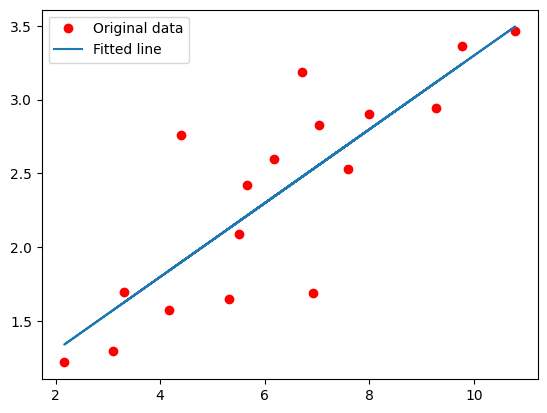

Testing... (Mean square loss Comparison)
Testing cost= 0.07910849
Absolute mean square loss difference: 0.0021177456


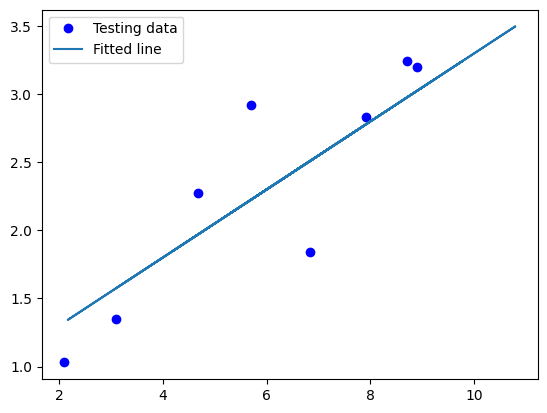

In [21]:
# 开始训练
with tf.Session() as sess:
    sess.run(init)

    # 灌入所有训练数据
    """zip(a,b)相当于把(a,b)变成了一个字典，而train_X or train_Y是列表"""
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # 打印出每次迭代的log日志
        """每隔display_step输出一次（目前设置为50），我们输出迭代次数，下降值，更新的权重W和偏置b"""
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    """迭代完显示作图，这里就不多说了，不难理解的。"""
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # 作图
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    # 测试样本
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()